# Solucionario del laboratorio final

In [1]:
from qiskit import QuantumCircuit, IBMQ, execute, Aer, transpile
import numpy as np
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector 
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import math
import pandas as pd
from math import pi
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.fake_provider import FakeVigo

## Pregunta 1

Primero debemos generar los estados $|+\rangle$, $|+\rangle$ y $|-\rangle$. Para esto debemos usar las transformaciones asociados al Hadamard y Not ($H$ y $X$).
Cada transformación actua sobre un qubit de la siguiente manera:

$$H|0\rangle = \frac{|0\rangle+|1\rangle}{\sqrt{2}}$$
$$H|1\rangle = \frac{|0\rangle-|1\rangle}{\sqrt{2}}$$
$$X|0\rangle = |1\rangle$$
$$X|1\rangle = |0\rangle$$

Partimos de un estado:
$$|\psi_0\rangle=|000\rangle$$

Aplicamos la siguiente transformación: $U_1=I \otimes I\otimes X$

$$|\psi_1\rangle=U_1|000\rangle=|001\rangle$$

Ahora aplicamos la transformación: $U_2=H \otimes H\otimes H$

$$|\psi_2\rangle=U_2|001\rangle$$

$$|\psi_2\rangle=\frac{(|0\rangle+|1\rangle)}{\sqrt{2}}\otimes\frac{(|0\rangle+|1\rangle)}{\sqrt{2}}\otimes\frac{(|0\rangle-|1\rangle)}{\sqrt{2}})$$

$$|\psi_2\rangle=\frac{1}{2\sqrt{2}}(|000\rangle+|010\rangle+|100\rangle+|110\rangle-|001\rangle-|011\rangle-|101\rangle-|111\rangle)$$

Definimos los proyectores: $$\pi_{0} = | 0 \rangle \langle 0 | $$ $$\pi_{1} = | 1 \rangle \langle 1 | $$  

Se cumple la propiedad: $\pi_{0}+\pi_{1} = I$. Si deseamos medir las probabilidades del qubit central debemos obtener una expresión del proyector para este qubit.

Con ayuda de las propiedades anteriores se define los proyectores parciales del qubit central:

$$\pi_{0}^1 = \pi_{0}\otimes\pi_{0}\otimes\pi_{0} + \pi_{1}\otimes\pi_{0}\otimes\pi_{0} + \pi_{0}\otimes\pi_{0}\otimes\pi_{1} + \pi_{1}\otimes\pi_{0}\otimes\pi_{1}$$ 

$$\pi_{1}^1 = \pi_{0}\otimes\pi_{1}\otimes\pi_{0} + \pi_{1}\otimes\pi_{1}\otimes\pi_{0} + \pi_{0}\otimes\pi_{1}\otimes\pi_{1} + \pi_{1}\otimes\pi_{1}\otimes\pi_{1}$$ 

Donde el super indice "1" hace referencia al qubit central.

Es decir $P_0$ y $P_1$ sería:

$$P_0=\langle\psi_2|\pi_{0}^1|\psi_2\rangle=\langle\psi_2|\pi_{0}\otimes\pi_{0}\otimes\pi_{0} + \pi_{1}\otimes\pi_{0}\otimes\pi_{0} + \pi_{0}\otimes\pi_{0}\otimes\pi_{1} + \pi_{1}\otimes\pi_{0}\otimes\pi_{1}|\psi_2\rangle$$

$$P_1=\langle\psi_2|\pi_{1}^1|\psi_2\rangle=\langle\psi_2|\pi_{0}\otimes\pi_{1}\otimes\pi_{0} + \pi_{1}\otimes\pi_{1}\otimes\pi_{0} + \pi_{0}\otimes\pi_{1}\otimes\pi_{1} + \pi_{1}\otimes\pi_{1}\otimes\pi_{1}|\psi_2\rangle$$

$$P_0=\frac{1}{8}+\frac{1}{8}+\frac{1}{8}+\frac{1}{8}=\frac{1}{2}$$

$$P_1=\frac{1}{8}+\frac{1}{8}+\frac{1}{8}+\frac{1}{8}=\frac{1}{2}$$

Para que el estado final del circuito cuántico tenga la misma forma , prepararemos el estado $|-\rangle$, $|+\rangle$ y $|+\rangle$, en ese orden y mediremos el qubit central.

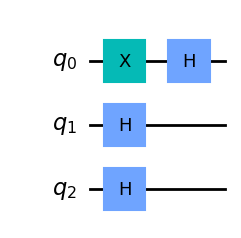

In [118]:
q1=q=QuantumCircuit(3)
q1.x(0)
q1.h(0)
q1.h(1)
q1.h(2)
s1=Statevector(q1)
q1.draw(output='mpl')

In [119]:
s1.draw('Latex')

<IPython.core.display.Latex object>

In [120]:
probs_s1 = s1.probabilities_dict([1])
print('probs parciales: {}'.format(probs_s1))

probs parciales: {'0': 0.4999999999999998, '1': 0.4999999999999998}


Obtenemos las probabilidades parciales encontradas de manera teórica.

## Pregunta 2

Observamos la Q-esfera y podemos notar 2 latitudes, esto indica que se esta usando 4 qubits.

Diseñamos el siguiente circuito que entrelaza 4 qubits:

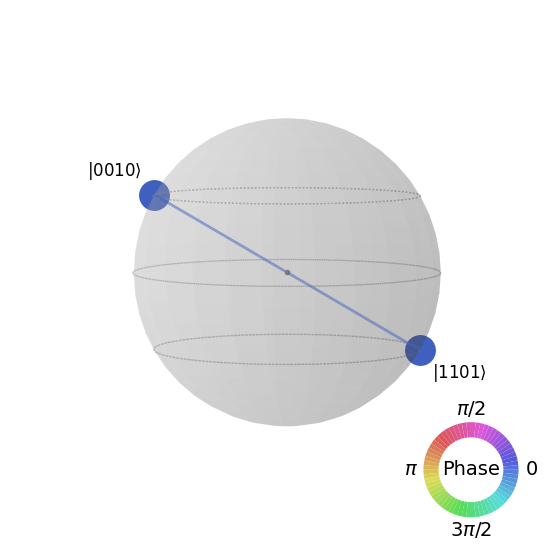

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

n = 4
qc = QuantumCircuit(n)
qc.h(0)
for i in range(n-1):
    qc.cx(0, i+1)
qc.x(1)
ps=Statevector(qc)
plot_state_qsphere(qc, show_state_labels=True)

Observamos que el estado correspondiente al sistema pedido, es de 4 qubits entrelazados.

In [5]:
ps.draw('Latex')

<IPython.core.display.Latex object>

Cada regristro cuántico posee $2n-1$ grados de libertad.

Para este caso el número de qubits independientes sería $2n-1-ligaduras$:

Por lo tanto si tenemos 6 ligaduras, ya que el sistema es de 4 qubits entrelazados, necesitamos como mínimo 1 qubit independiente.

## Pregunta 3

Primero definimos los proyectores necesarios y la transformación $ U_3(\theta,\phi,\lambda) $

Se definen los proyectores:$$\pi_{0} = | 0 \rangle \langle 0 | $$ $$\pi_{1} = | 1 \rangle \langle 1 | $$  

La transformación $U_3$ se define como:

$$U_3(\theta,\phi,\lambda)=\begin{pmatrix}
\cos{\frac{\theta}{2}} & -e^{i\lambda}\sin{\frac{\theta}{2}} \\
e^{i\phi}\sin{\frac{\theta}{2}} & e^{i(\phi+\lambda)}\cos{\frac{\theta}{2}}
\end{pmatrix}$$

La compuerta $CU_3$ es una transformación que actua sobre 1 qubit, dependiendo del estado del qubit de control. Si el qubit de control se encuentra en el estado $|1\rangle$ entonces $U_3$ actua sobre el qubit objetivo, pero si el qubit de control se encuentra en el estado $|0\rangle$, entonces el qubit objetivo no es afectado por $U_3$.

Se puede expresar esta compuerta en notación Dirac:

$$CU_3 = | 0 \rangle \langle 0 | \otimes I + | 1 \rangle \langle 1 | \otimes U_3$$

Las transformaciones $U_3$ y $I$ se pueden expresar como una suma de proyectores con sus respectivos coeficientes:

$$U_3 =\cos{\frac{\theta}{2}} | 0 \rangle \langle 0 | -e^{i\lambda}\sin{\frac{\theta}{2}} | 0 \rangle \langle 1 | + e^{i\phi}\sin{\frac{\theta}{2}}| 1 \rangle \langle 0 | + e^{i(\phi+\lambda)}\cos{\frac{\theta}{2}}| 1 \rangle \langle 1 |$$

$$I = | 0 \rangle \langle 0 | + | 1 \rangle \langle 1 |$$

Por lo tanto la compuerta $CU_3$ en notación Dirac es:

$$CU_3 = | 0 \rangle \langle 0 | \otimes (| 0 \rangle \langle 0 | + | 1 \rangle \langle 1 |) + | 1 \rangle \langle 1 | \otimes(\cos{\frac{\theta}{2}} | 0 \rangle \langle 0 | -e^{i\lambda}\sin{\frac{\theta}{2}} | 0 \rangle \langle 1 | + e^{i\phi}\sin{\frac{\theta}{2}}| 1 \rangle \langle 0 | + e^{i(\phi+\lambda)}\cos{\frac{\theta}{2}}| 1 \rangle \langle 1 |)$$

Probamos para un estado $|10\rangle$ y para $\theta=\pi$, $\phi=\frac{\pi}{2}$ y $\lambda=\frac{7\pi}{2}$.

$$U_3 =i | 0 \rangle \langle 1 | + i| 1 \rangle \langle 0 |$$

$$CU_3|10\rangle=\left[| 0 \rangle \langle 0 | \otimes (| 0 \rangle \langle 0 | + | 1 \rangle \langle 1 |) + | 1 \rangle \langle 1 | \otimes(i | 0 \rangle \langle 1 | + i| 1 \rangle \langle 0 |)]|1\rangle|0\rangle\right]|10\rangle$$
$$CU_3|10\rangle=| 0 \rangle \langle 0 | \otimes (| 0 \rangle \langle 0 | + | 1 \rangle \langle 1 |)|10\rangle+| 1 \rangle \langle 1 | \otimes(i | 0 \rangle \langle 1 | + i| 1 \rangle \langle 0 |)|10\rangle$$
$$CU_3|10\rangle=i|11\rangle$$

Implementación en Qiskit:

In [4]:
from qiskit.quantum_info.operators import Operator

# bra kets de los quibits:
Bra0 = Operator([1,0])
Bra1 = Operator([0,1])
ket0 = Operator([[1],[0]])
ket1 = Operator([[0],[1]])

#proyectores:
Proyector_00 = Operator(np.outer(ket0, Bra0))
Proyector_11 = Operator(np.outer(ket1, Bra1))
Proyector_01 = Operator(np.outer(ket0, Bra1))
Proyector_10 = Operator(np.outer(ket1, Bra0))

#valores de prueba:
theta=np.pi
phi=np.pi/2
lamda=7*np.pi/2

#Operadores:
Identidad=Proyector_00+Proyector_11
U_3=np.cos(theta/2)*Proyector_00-np.exp(1j*lamda)*np.sin(theta/2)*Proyector_01+np.exp(1j*phi)*np.sin(theta/2)*Proyector_10+np.exp(1j*(phi+lamda))*np.cos(theta/2)*Proyector_11
CU_3=Proyector_00.tensor(Identidad)+Proyector_11.tensor(U_3)

Probamos la transformación obtenida para un estado inicial $|10\rangle$ y para $\theta=\pi$, $\phi=\frac{\pi}{2}$ y $\lambda=\frac{7\pi}{2}$, siendo el primer qubit de control.

In [5]:
ket10=ket1.tensor(ket0)
psi=Statevector(np.dot(CU_3,ket10))
psi.draw('Latex')

<IPython.core.display.Latex object>

Encontramos el estado que se determinó de manera teórica.

## Pregunta 4

Se tiene la siguiente sumatoria:

$$S_1=\sum_{i=1}^n x_iz_i \pmod 2$$

$$S_1=(x_1z_1+x_2z_2+x_3z_3+...+x_nz_n)\pmod 2$$

Cada $x_iz_i$ puede tomar el valor de 1 o 0, ya que $x_i$ y $z_i$ toman los valores {0,1}.

Supongamos que existen $N$ veces que $x_iz_i$ toma el valor de "1", es decir $S_1$ sería:

$$S_1=N \pmod 2$$

Si N es par, entonces:

$$S_1=0$$

Ya que el modulo 2 de un número par es cero.

Si N es impar, entonces:

$$S_1=1$$

Ya que el modulo 2 de un número impar es 1.

Ahora estudiemos el operador XOR:

Este operador actúa sobre 2 bits de la siguiente forma: $$ 0\oplus0=0$$
$$ 1\oplus0=1$$
$$ 0\oplus1=1$$
$$ 1\oplus1=0$$

Y sobre 3 bits actúa de la siguiente forma: $$ 0\oplus0\oplus0=0$$
$$ 0\oplus0\oplus1=1$$
$$ 0\oplus1\oplus0=1$$
$$ 0\oplus1\oplus1=0$$
$$ 1\oplus0\oplus0=1$$
$$ 1\oplus0\oplus1=0$$
$$ 1\oplus1\oplus0=0$$
$$ 1\oplus1\oplus1=1$$

Es decir que la suma sobre n bits depende de la cantidad de "1". Para una cantidad par de "1", la suma es 0 y para una cantidad impar, la suma es 1.

Si otra vez suponemos que en la siguiente expresión: $$S_2=x_1z_1\oplus x_2z_2\oplus...\oplus x_nz_n $$

Existen $N$ veces que $x_iz_i$ toma el valor de "1". 

Para $N$ par se obtiene:

$$S_2=0$$

Y para $N$ impar:

$$S_2=1$$

Por lo tanto se tiene que: $$N=par \rightarrow S_1=S_2$$
$$N=impar \rightarrow S_1=S_2$$

Es decir se cumple que: $$\sum_{i=1}^n x_iz_i \pmod 2=x_1z_1\oplus x_2z_2\oplus...\oplus x_nz_n$$

## Pregunta 5

Diseñamos el siguiente oraculo con las condiciones pedidas:

In [10]:
from qiskit.circuit.library import XGate
def oraculo():   
    mcx = XGate().control(3)
    oraculo_b = QuantumCircuit(4)
    oraculo_b.append(mcx,[0,1,2,3])
    oraculo_b.ccx(1,2,3)
    oraculo_b.cx(3,1)
    oraculo_b.cx(1,3)
    oraculo_b.ccx(0,2,3)
    oraculo_b.cx(3,0)
    oraculo_b.cx(0,3)
    return oraculo_b

Diseñamos el circuito de DJ:

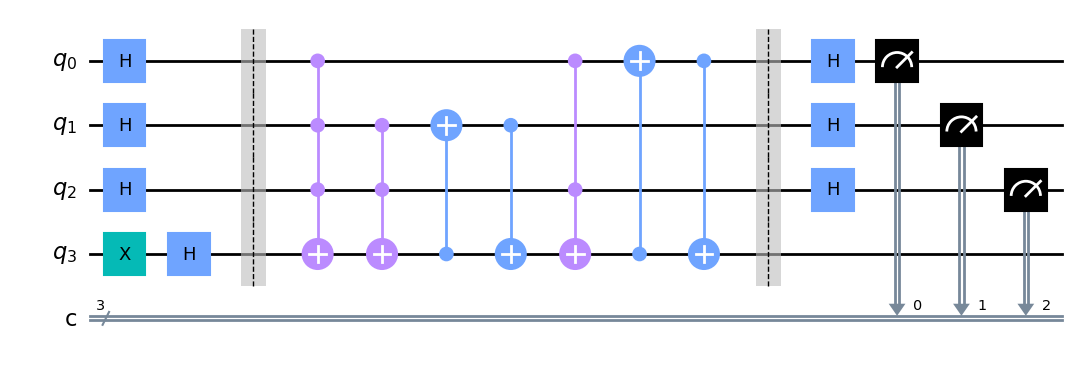

In [11]:
qcc=QuantumCircuit(4,3)
qcc.x(3)
for x in range(4):
    qcc.h(x)   
qcc.barrier()
qcc=qcc.compose(oraculo())
qcc.barrier()
for x in range(3):
    qcc.h(x)
qcc.measure([0,1,2],[0,1,2])
qcc.draw(output='mpl')

Simulamos el circuito:

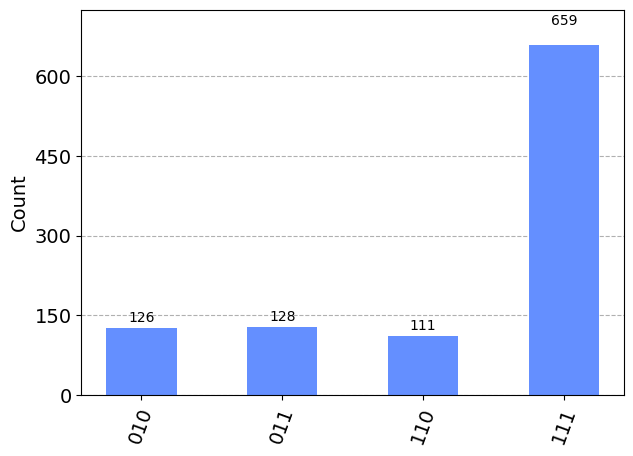

In [12]:
aer_si = Aer.get_backend('aer_simulator')
result = aer_si.run(qcc).result()
answe = result.get_counts()

plot_histogram(answe)

Se observa que el estado $|000\rangle$ tiene 0 probabilidad, por lo tanto el oraculo es balanceado.

## Pregunta 6

Elegimos un caso especial: para n=5 qubits.

Definimos el circuito mas básico para una función balanceada:

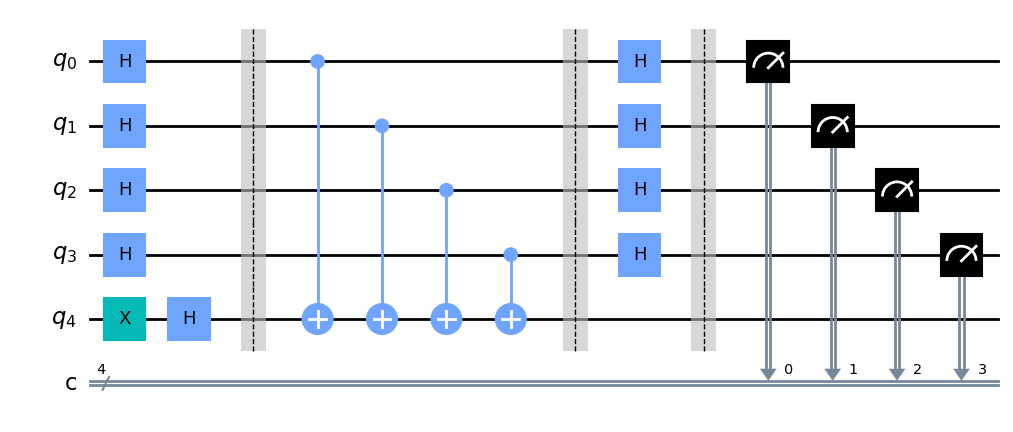

In [92]:
func_balan_1 = QuantumCircuit(5,4)
func_balan_1.x(4)
for x in range(5):
    func_balan_1.h(x) 
func_balan_1.barrier()
for i in range(4):
    func_balan_1.cx(i,4)
func_balan_1.barrier()
for x in range(4):
    func_balan_1.h(x)
func_balan_1.barrier()
func_balan_1.measure([0,1,2,3],[0,1,2,3])
func_balan_1.draw(output='mpl')

Obtenemos el histograma para este circuito:

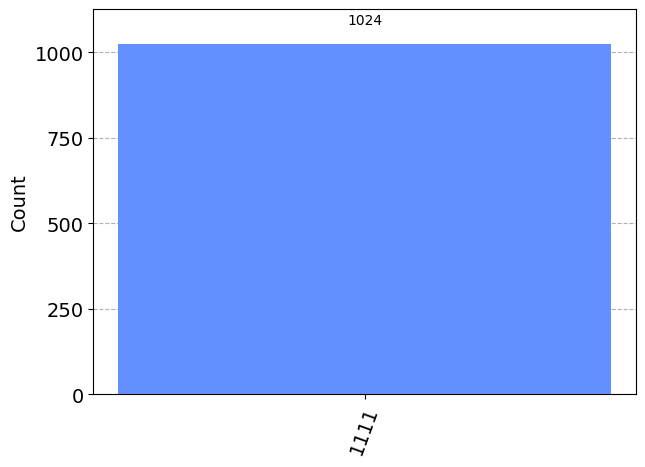

In [94]:
aer_si = Aer.get_backend('aer_simulator')
result = aer_si.run(func_balan_1).result()
ans = result.get_counts()
plot_histogram(ans)

Resulta ser una función balanceada como se espera.

Si ahora quitamos los $CX$ entre los qubits $1$-$4$ y $2$-$4$:

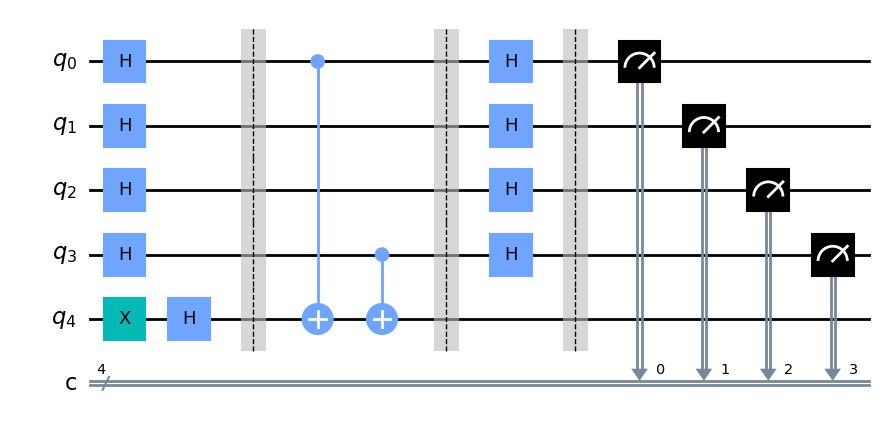

In [96]:
func_balan_2 = QuantumCircuit(5,4)
func_balan_2.x(4)
for x in range(5):
    func_balan_2.h(x) 
func_balan_2.barrier()
for i in range(4):
    if i==1 or i==2:
        continue
    else:
        func_balan_2.cx(i,4)
func_balan_2.barrier()
for x in range(4):
    func_balan_2.h(x)
func_balan_2.barrier()
func_balan_2.measure([0,1,2,3],[0,1,2,3])
func_balan_2.draw(output='mpl')

Obtenemos el histograma del circuito:

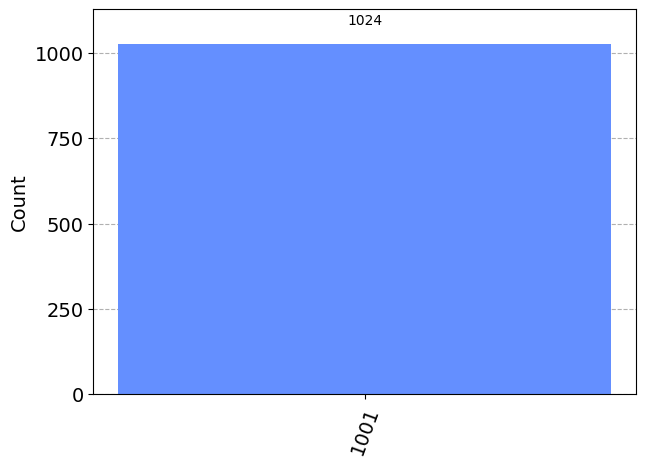

In [98]:
aer_si = Aer.get_backend('aer_simulator')
result = aer_si.run(func_balan_2).result()
ans = result.get_counts()
plot_histogram(ans)

Se observa que la probabilidad de $|0000\rangle$ es cero, entonces si quitamos algunos $CX$ la función puede seguir siendo balanceada.

## Pregunta 7

Para este problema de nodos y aristas tenemos el siguiente grafo:

<img src="grafo.PNG" width="50%" align="center">
    </td></tr>

Si a grupamos como se observa en la figura, el número de aristas correctas maximo es 6,por lo tanto podemos asignar el ket $|0\rangle$ al grupo de rojo y el ket $|1\rangle$ al grupo azul, o viceversa.

In [63]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import XGate,ZGate
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
from qiskit.circuit.library.standard_gates import SGate, TGate, ZGate

Diseñamos las funciones que usaremos: una parte del oraculo y la función transformada cuántica de fourier inversa, la cual nos ayudará para diseñar el circuito sumador.

In [75]:
def qft3_dagger(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit+11, n-qubit-1+11)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m+11, j+11)
        qc.h(j+11)
    return qc

def oracle_part(qf,qr):
    mcx = XGate().control(3)
    
    qf.cx(qr[0], qr[5])
    qf.cx(qr[3], qr[5])
    qf.barrier()
    qf.cx(qr[0], qr[6])
    qf.cx(qr[4], qr[6])
    qf.barrier()
    qf.cx(qr[1], qr[7])
    qf.cx(qr[3], qr[7])    
    qf.barrier()    
    qf.cx(qr[1], qr[8])
    qf.cx(qr[4], qr[8])
    qf.barrier()    
    qf.cx(qr[2], qr[9])
    qf.cx(qr[3], qr[9])
    qf.barrier()    
    qf.cx(qr[2], qr[10])
    qf.cx(qr[4], qr[10])   
    qf.barrier()   
    
    #INICIO DE SUMADOR
    T_gate = TGate().control(1)
    S_gate = SGate().control(1)
    Z_gate = ZGate().control(1)
    for i in range(3):
        qf.h(qr[11+i])
    qf.barrier()    
    for i in range(6): 
        qf.append(T_gate,[qr[5+i], qr[11]])
        qf.append(S_gate,[qr[5+i], qr[12]])
        qf.append(Z_gate,[qr[5+i], qr[13]])
        qf.barrier()
    qf.barrier()    
    qft3_dagger(qf, 3)
    #FIN DE SUMADOR
    
    qf.barrier() 
    qf.x(11)
    qf.append(mcx,[11,12,13,14])
    return qf

Definimos la función oraculo total:

In [76]:
def oracle(qc,qr):   
    q_c=oracle_part(qc,qr)
    qc1=q_c.inverse()
    q_c.z(14)
    q_c.compose(qc1,inplace=True)   
    return q_c

In [77]:
#qr=QuantumRegister(15)
#qf=QuantumCircuit(qr)
#oracle(qf,qr).draw(output='mpl')

Definimos la función difusor:

In [78]:
def grover_diffusion(q_c,qr):
    mcz = ZGate().control(4)
    
    q_c.barrier()
    q_c.h(range(5))
    q_c.x(range(5))
    q_c.append(mcz,list(range(0,5)))
    q_c.x(range(5))
    q_c.h(range(5))
    q_c.barrier()
    return q_c

Definimos la función grover que engloba todas las funciones anteriores:

In [79]:
def grover(q_c,qr):
    return grover_diffusion(oracle(q_c,qr),qr)

Por ultimo aplicamos las compuertas Hadamard a los qubits de los nodos y aplicamos la función grover 3 veces, ya que si observamos la ecuación $k=\frac{\pi\sqrt{2^n}}{4\sqrt{a}}-\frac{1}{2}$, para un valor deseado de a=2 (2 posibles valores de kets para la agrupación de los nodos 3 y 4) y para n=5, k es aproximadamente 3.

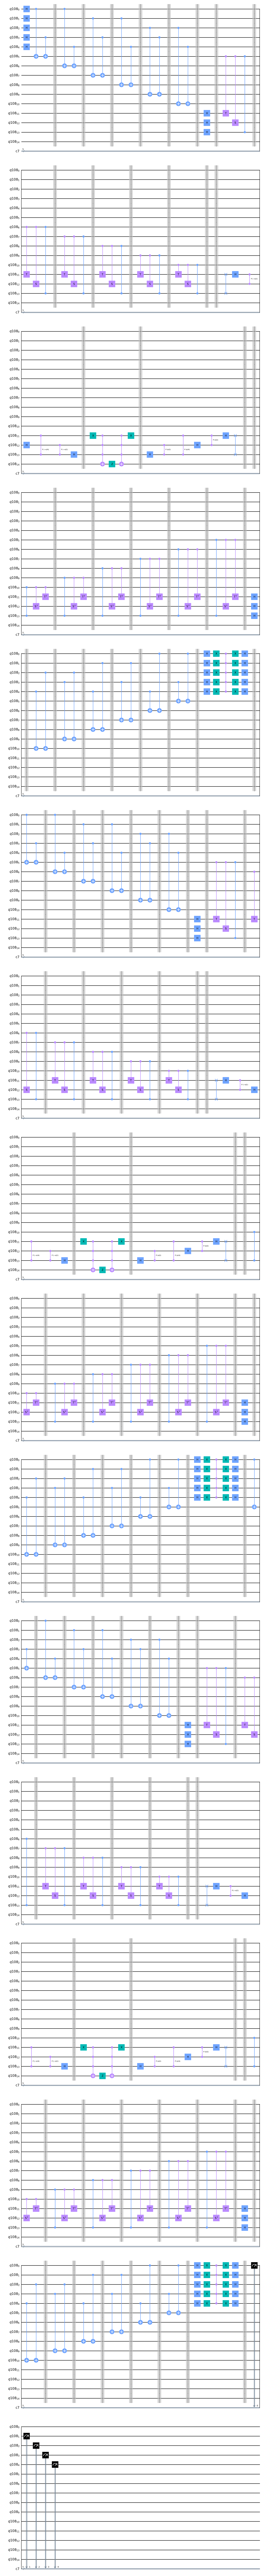

In [88]:
qr=QuantumRegister(15)
q_c=QuantumCircuit(qr)

qra=QuantumRegister(15)
cra=ClassicalRegister(5)
qa=QuantumCircuit(qra,cra)

qa.h(range(5))
qb=grover(q_c,qr)
qa.compose(qb.compose(qb.compose(qb)),inplace=True)

qa.measure(range(5),cra)

qa.draw(output='mpl')

Simulamos el circuito y observamos el histograma:

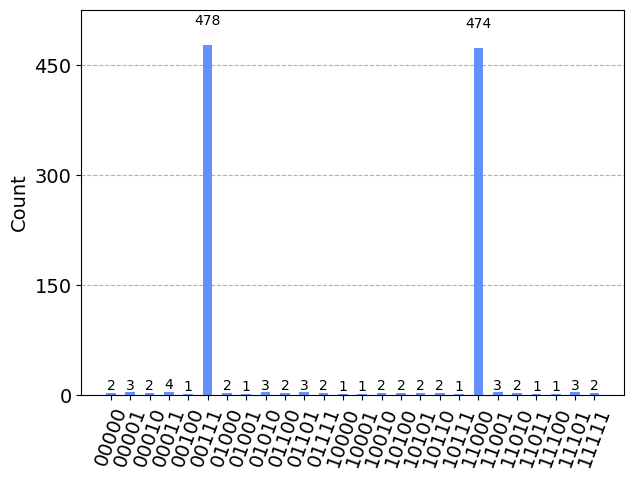

In [84]:
qasm_simulator = Aer.get_backend('qasm_simulator')

job = execute(qa, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qa)

plot_histogram(counts)

Como era de esperar los resultados mas probables son 2, el ket $|11100\rangle$ y el ket $|00011\rangle$, donde los nodos 3 y 4 podian tomar los valores "00" o "11".

## Pregunta 8

A partir del siguiente estado: $$|\psi_3\rangle=\sin{3\theta}|A\rangle+
\cos{3\theta}|B\rangle$$

$$|\psi_3\rangle=\sin{(2\theta+\theta)}|A\rangle+
\cos{(2\theta+\theta)}|B\rangle$$

Usamos la propiedad de suma de angulos: $$|\psi_3\rangle=(\sin{2\theta}\cos{\theta}+\cos{2\theta}\sin{\theta})|A\rangle+
(\cos{2\theta}\cos{\theta}-\sin{2\theta}\sin{\theta})|B\rangle$$

$$|\psi_3\rangle=\sin{2\theta}\cos{\theta}|A\rangle-\sin{2\theta}\sin{\theta}|B\rangle+\cos{2\theta}\sin{\theta}|A\rangle+
\cos{2\theta}\cos{\theta}|B\rangle$$

Usamos la propiedad de ortogonalidad de los estados $|A\rangle$  y  $|B\rangle$:

$$\langle A|A\rangle = 1$$
$$\langle B|B\rangle = 1$$
$$\langle B|A\rangle = 0$$
$$\langle A|B\rangle = 0$$

Redefinimos la ultima ecuación:

$$|\psi_3\rangle=\sin{2\theta}\cos{\theta}|A\rangle-\sin{2\theta}\sin{\theta}|B\rangle+\cos{2\theta}\sin{\theta}|A\rangle+
\cos{2\theta}\cos{\theta}|B\rangle$$

$$|\psi_3\rangle=\cos{2\theta}\sin{\theta}|A\rangle\langle A|A\rangle - \sin{2\theta}\sin{\theta}|B\rangle\langle A|A\rangle + \sin{2\theta}\sin{\theta}|A\rangle\langle B|A\rangle + \cos{2\theta}\sin{\theta}|B\rangle\langle B|A\rangle + \cos{2\theta}\cos{\theta}|A\rangle\langle A|B\rangle - \sin{2\theta}\cos{\theta}|B\rangle\langle A|B\rangle + \\  \sin{2\theta}\cos{\theta}|A\rangle\langle B|B\rangle + \cos{2\theta}\cos{\theta}|B\rangle\langle B|B\rangle$$

Factorizamos:

$$|\psi_3\rangle=(\cos{2\theta}|A\rangle\langle A| - \sin{2\theta}|B\rangle\langle A| + \sin{2\theta}|A\rangle\langle B| + \cos{2\theta}|B\rangle\langle B|)(\sin{\theta}|A\rangle+\cos{\theta}|B\rangle$$

Reconocemos que el primer factor representa la matriz de rotación: $$R(2\theta)=\begin{pmatrix}
\cos{2\theta} & -\sin{2\theta} \\
\sin{2\theta} & \cos{2\theta}
\end{pmatrix}$$

Por lo tanto:

$$|\psi_3\rangle=R(2\theta)(\sin{\theta}|A\rangle+\cos{\theta}|B\rangle)$$

La acción de aplicar $U_wU_f$ sobre $|s\rangle$ es rotarlo un ángulo de 2$\theta$, si aplicamos k veces $U_wU_f$ a $|s\rangle$, entonces significa rotarlo en sentido antihorario $2\theta k$:

$$|\psi_3\rangle=R(2\theta k)(\sin{\theta}|A\rangle+\cos{\theta}|B\rangle)$$

$$|\psi_3\rangle=\sin{(2\theta k+\theta)}|A\rangle+
\cos{(2\theta k+\theta)}|B\rangle$$

Para el estado final $|\psi_3\rangle$ sea igual al ket de estados deseados entonces: 

$$2\theta k+\theta=\frac{\pi}{2}$$

$$k=\frac{\pi}{4\theta}-\frac{1}{2}$$

Para nuestro caso: $n=5$ y $a=4$, entonces:

$$\theta=\arcsin{(\sqrt{\frac{a}{2^n}})}$$

$$\theta=\arcsin{(\sqrt{\frac{4}{2^5}})}$$

$$\theta\approx 0.36$$

$$k=\frac{\pi}{4.0,36}-\frac{1}{2}$$

$$k\approx 2$$

Por lo tanto se debe aplicar 2 veces el oraculo y difusor en este caso.

## Extra 1

$$|\psi_3\rangle =U_\omega|\psi_2\rangle=\left(2|s\rangle\langle s|-I\right)\left(-\sqrt{\frac{a}{2^n}}|A\rangle+\sqrt{\frac{b}{2^n}}|B\rangle\right)$$

$$|s\rangle\langle s|=\frac{a}{2^n}|A\rangle\langle A|+\frac{b}{2^n}|B\rangle\langle B|+\frac{\sqrt{ab}}{2^n}\left[|A\rangle\langle B|+|B\rangle\langle A|\right]$$

Si: $$\sin^2{\theta}=\frac{a}{2^n} ,  \cos^2{\theta}=\frac{b}{2^n}$$

Podemos expresar el operador identidad I como: $I=|A\rangle\langle A|+|B\rangle\langle B|$

entonces: $$|\psi_3\rangle =U_\omega|\psi_2\rangle=\left(2|s\rangle\langle s|-|A\rangle\langle A|-|B\rangle\langle B|\right)\left(-\sin{\theta}|A\rangle+ \cos{\theta}|B\rangle\right)$$

$$|\psi_3\rangle  \left(2\frac{a}{2^n}|A\rangle\langle A|+2\frac{b}{2^n}|B\rangle\langle B|+2\frac{\sqrt{ab}}{2^n}\left[|A\rangle\langle B|+|B\rangle\langle A|\right]-|A\rangle\langle A|-|B\rangle\langle B|\right)\left(-\sin{\theta}|A\rangle+ \cos{\theta}|B\rangle\right)$$

$$|\psi_3\rangle=\left(2\sin^2{\theta}|A\rangle\langle A|+2\cos^2{\theta}|B\rangle\langle B|+2\sin{\theta}\cos{\theta}\left[|A\rangle\langle B|+|B\rangle\langle A|\right]-|A\rangle\langle A|-|B\rangle\langle B|\right)\left(-\sin{\theta}|A\rangle+ \cos{\theta}|B\rangle\right)$$

Usamos la propiedad de ortogonalidad: $\langle i|j\rangle=\delta_{ij}$

$$|\psi_3\rangle=-2\sin^3{\theta}|A\rangle-2\sin^2{\theta}\cos{\theta}|B\rangle+\sin{\theta}|A\rangle+2\cos^3{\theta}|B\rangle+2\sin{\theta}\cos^2{\theta}|A\rangle-\cos{\theta}|B\rangle$$

Agrupamos y factorizamos:

$$|\psi_3\rangle=(-2\sin^3{\theta}+\sin{\theta}+2\sin{\theta}\cos^2{\theta})|A\rangle+
(-2\sin^2{\theta}\cos{\theta}+2\cos^3{\theta}-\cos{\theta})|B\rangle$$

$$|\psi_3\rangle=(\sin{\theta}+2\sin{\theta}(\cos^2{\theta}-\sin^2{\theta}))|A\rangle+
(-\cos{\theta}+2\cos{\theta}(\cos^2{\theta}-\sin^2{\theta}))|B\rangle$$

Aplicamos la propiedad de arco doble $\cos^2{\alpha}-\sin^2{\alpha}=\cos{2\alpha}$ y factorizamos:

$$|\psi_3\rangle=\sin{\theta}(1+2\cos{2\theta})|A\rangle+
\cos{\theta}(-1+2\cos{2\theta})|B\rangle$$

Aplicamos la propiedad de arco triple:  $\sin{\alpha}(1+2\cos{2\alpha})=\sin{3\alpha}$ $\hspace{0.5cm}$ $\cos{\alpha}(-1+2\cos{2\alpha})=\cos{3\alpha}$:

$$|\psi_3\rangle=\sin{3\theta}|A\rangle+
\cos{3\theta}|B\rangle$$

## Pregunta 9

Definimos la QFT invsersa:

In [25]:
def qft_dagger(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    return qc

Nos piden encontrar el estado $|a\rangle$ que cumpla $\text{QFT}^{\dagger}|a\rangle = |100\rangle$.

Probamos con diferentes estados y tomamos su transformada inversa.

Diseñamos el circuito y suponemos que el estado $|\tilde{a}\rangle=|\tilde{4}\rangle$:

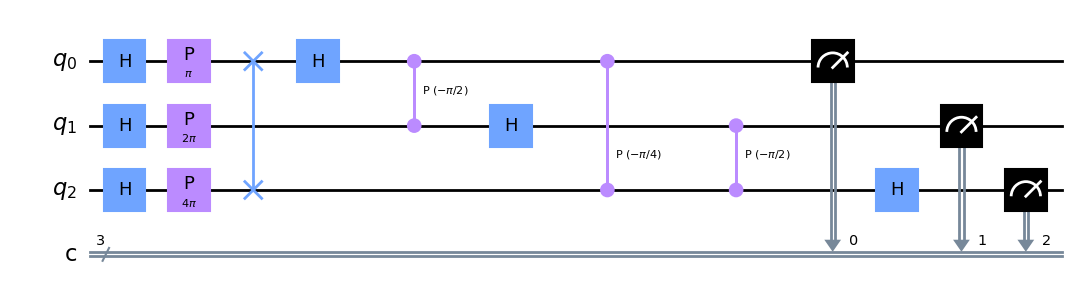

In [35]:
qubits=3
numero=4
qc=QuantumCircuit(qubits,qubits)
for i in range(qubits):
    qc.h(i)
for i in reversed(range(qubits)):
    qc.p(numero*np.pi/2**(qubits-1-i),i)
qft_dagger(qc, qubits)
s2=Statevector(qc)
qc.measure(range(qubits),range(qubits))  
qc.draw(output='mpl')

Medimos y obtenemos el histograma:

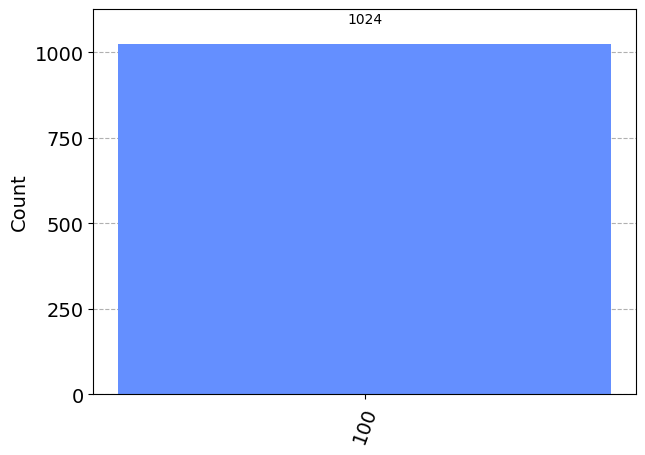

In [36]:
aer_si = Aer.get_backend('aer_simulator')
result = aer_si.run(qc).result()
answe = result.get_counts()

plot_histogram(answe)

El estado final es el ket $|100\rangle$ que se pedia.

## Pregunta 10

De manera similar nos piden encontrar Diseñamos el circuito y suponemos que el estado $|\tilde{a}\rangle=|\tilde{4}\rangle$:el estad $|b\rangle$ que cumpla $\text{QFT}^{\dagger}|b\rangle = |011\rangle$.

Diseñamos el circuito y suponemos que el estado $|\tilde{b}\rangle=|\tilde{3}\rangle$:

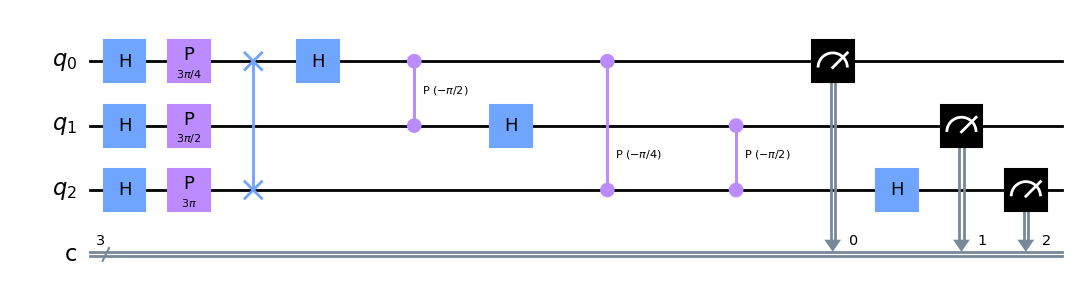

In [40]:
qubits=3
numero=3
q10=QuantumCircuit(qubits,qubits)
for i in range(qubits):
    q10.h(i)
for i in reversed(range(qubits)):
    q10.p(numero*np.pi/2**(qubits-1-i),i)
qft_dagger(q10, qubits)
s2=Statevector(q10)
q10.measure(range(qubits),range(qubits))
q10.draw(output='mpl')

Medimos y obtenemos el histograma:

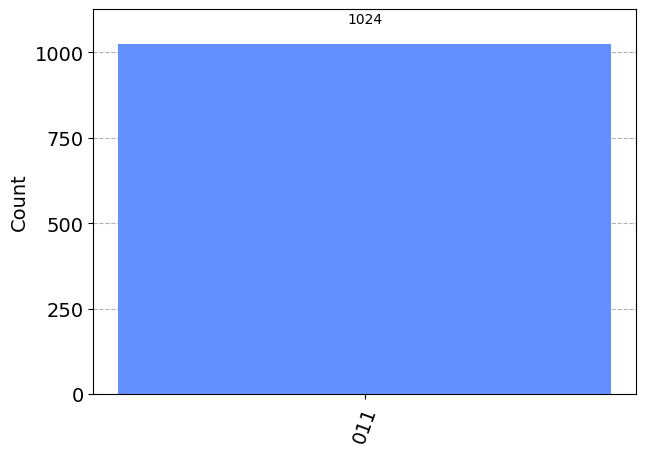

In [42]:
aer_si = Aer.get_backend('aer_simulator')
result = aer_si.run(q10).result()
ans10 = result.get_counts()

plot_histogram(ans10)

Observamos que el estado de salida es el pedido.